In [1]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy import integrate
from scipy.stats import norm
from scipy.stats import cauchy
from astroML.plotting import hist
from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astroML.plotting.mcmc import convert_to_stdev
import warnings; warnings.simplefilter('ignore')
import corner
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split

/Users/daniele/kerasenv/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
data = np.genfromtxt('../solutions/galaxyquasar.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

In [5]:
import pandas as pd

df = pd.read_csv('../solutions/galaxyquasar.csv')
print(df.head())
data = df.to_numpy() # Convert to numpy array


          u         g         r         i         z   class        z1  \
0  18.97213  18.53676  18.58280  18.34936  18.29215     QSO  0.522819   
1  19.24592  17.47646  16.47817  16.04472  15.68851  GALAXY  0.122846   
2  19.43536  17.70268  16.91565  16.58327  16.39128  GALAXY  0.000000   
3  19.31626  18.18312  17.39591  16.94549  16.65395  GALAXY  0.147435   
4  19.28828  19.11188  18.88937  18.80013  18.49183     QSO  2.011455   

       zerr  
0  0.000155  
1  0.000028  
2  0.000000  
3  0.000009  
4  0.000631  


In [7]:
u=data[:,0]
g=data[:,1]
r=data[:,2]
i=data[:,3]
z=data[:,4]
class_=data[:,5]
z1=data[:,6]
zerr=data[:,7]


In [8]:
u_g=u-g
g_r=g-r
r_i=r-i
i_z=i-z

In [9]:
X = np.column_stack([u_g, g_r, r_i, i_z])

y_raw = data[:, 5]
y = np.where(y_raw == 'GALAXY', -1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 4), (10000, 4), (40000,), (10000,))

Number of colors: [1 2 3 4]
completeness [0.98926738 0.98250117 0.98378441 0.98215119]
contamination [0.01234568 0.01254543 0.01252927 0.01266565]


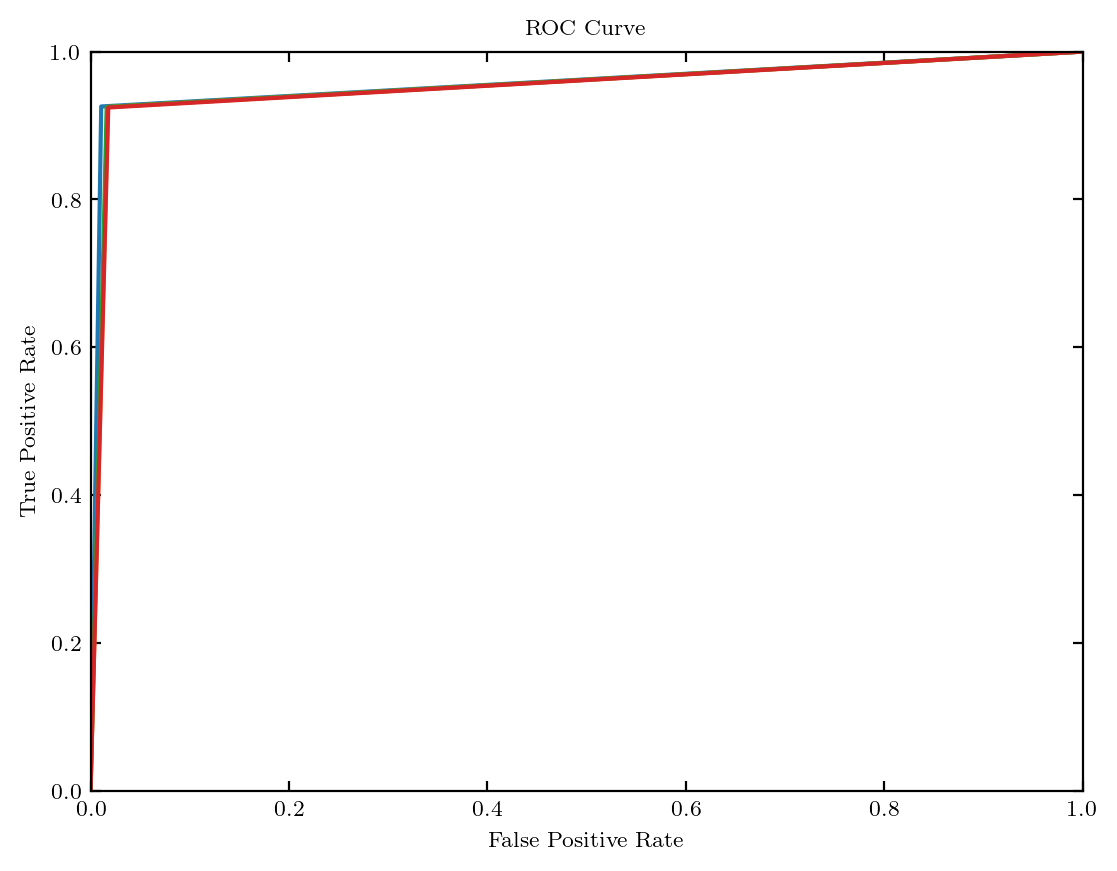

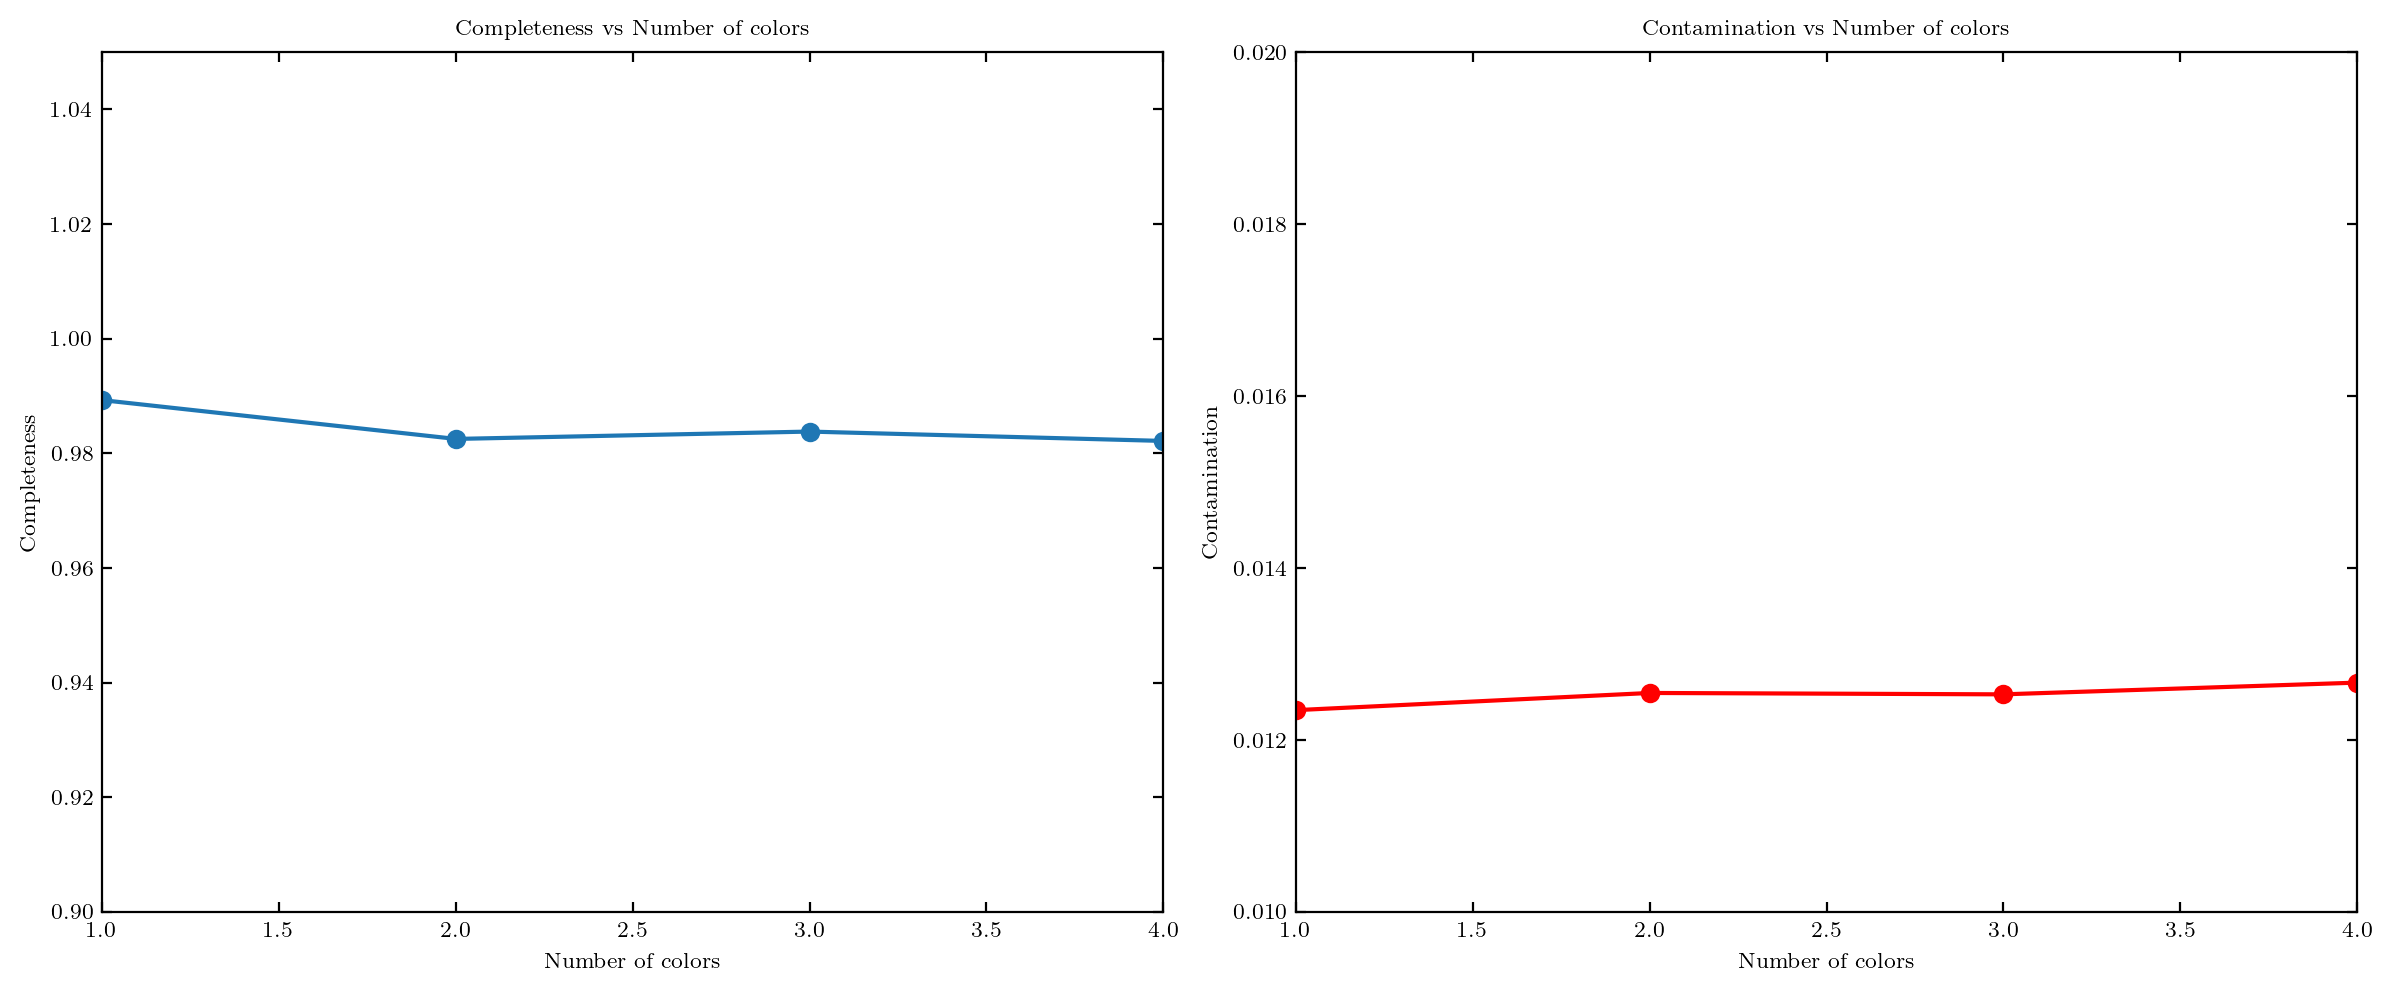

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from astroML.utils import completeness_contamination


Ncolors = np.arange(1, X.shape[1] + 1)
print(f'Number of colors: {Ncolors}')


classifiers = []
predictions = []
for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=0)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f}) for {nc} colors')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)
completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

plt.figure(figsize=(12,5))

# Plot completeness
plt.subplot(1,2,1)
plt.plot(Ncolors, completeness, marker='o')
plt.xlabel('Number of colors')
plt.ylim([0.9, 1.05])
plt.ylabel('Completeness')
plt.title('Completeness vs Number of colors')

# Plot contamination
plt.subplot(1,2,2)
plt.plot(Ncolors, contamination, marker='o', color='red')
plt.ylim([0.010, 0.02])

plt.xlabel('Number of colors')
plt.ylabel('Contamination')

plt.title('Contamination vs Number of colors')

plt.tight_layout()
plt.show()






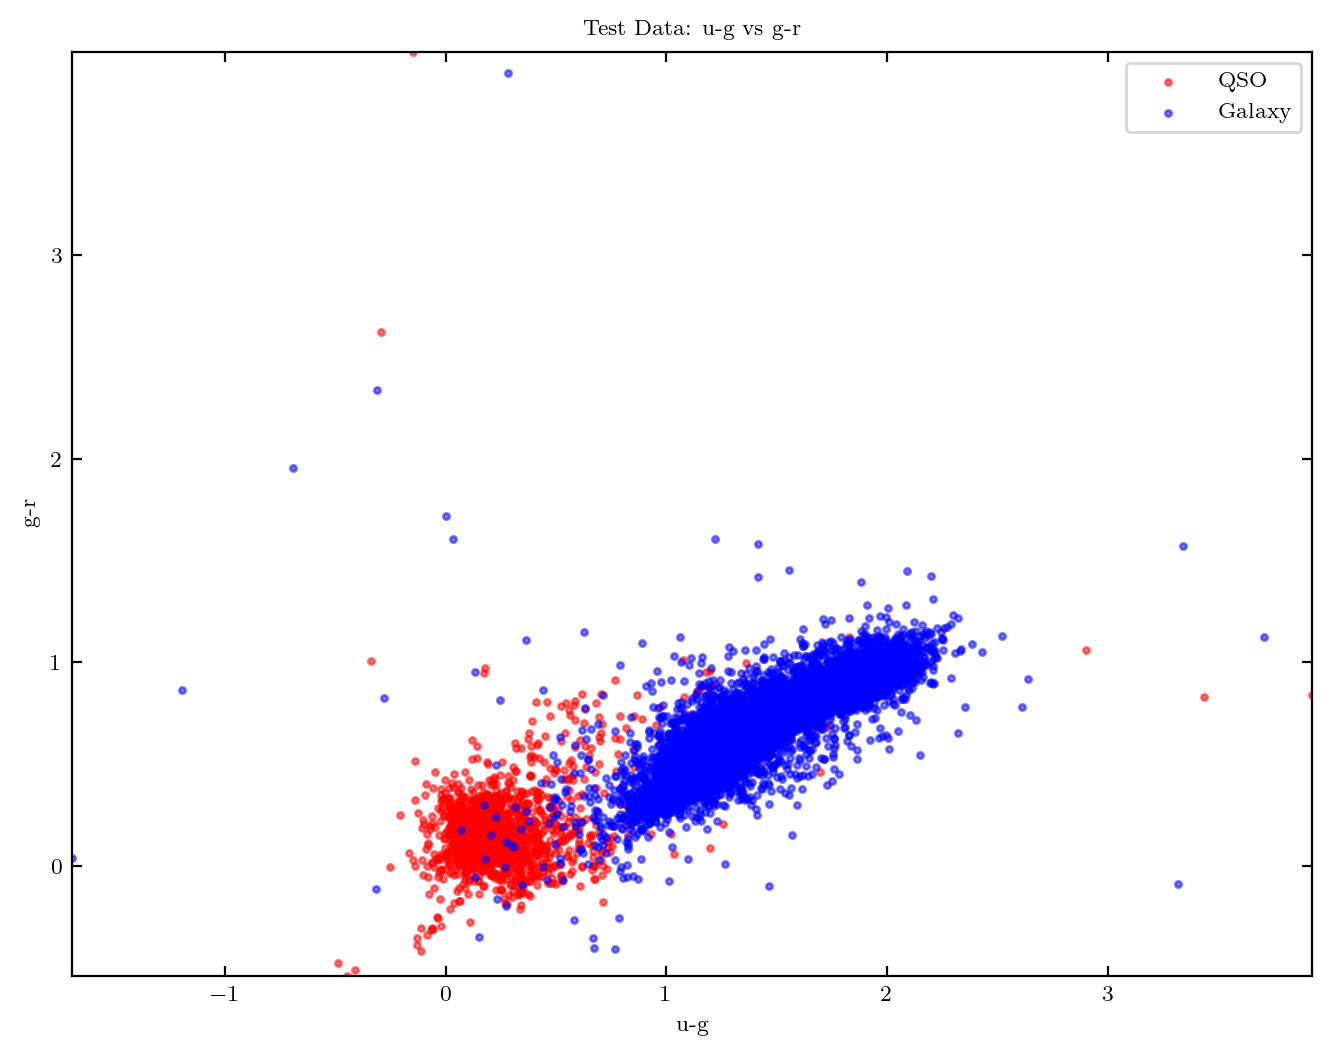

In [ ]:
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 0], X_test[mask_qso, 1], 
            color='red', s=5, alpha=0.5, label='QSO')
plt.scatter(X_test[mask_galaxy, 0], X_test[mask_galaxy, 1], 
            color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('u-g')
plt.ylabel('g-r')
plt.title('Test Data: u-g vs g-r')
plt.legend()
plt.show()

for qso g-r and u-r seems to be uncorrelated and they satifies the "naive" assumption of being conditionally indipendent, while for the galaxy they seems to be correlated

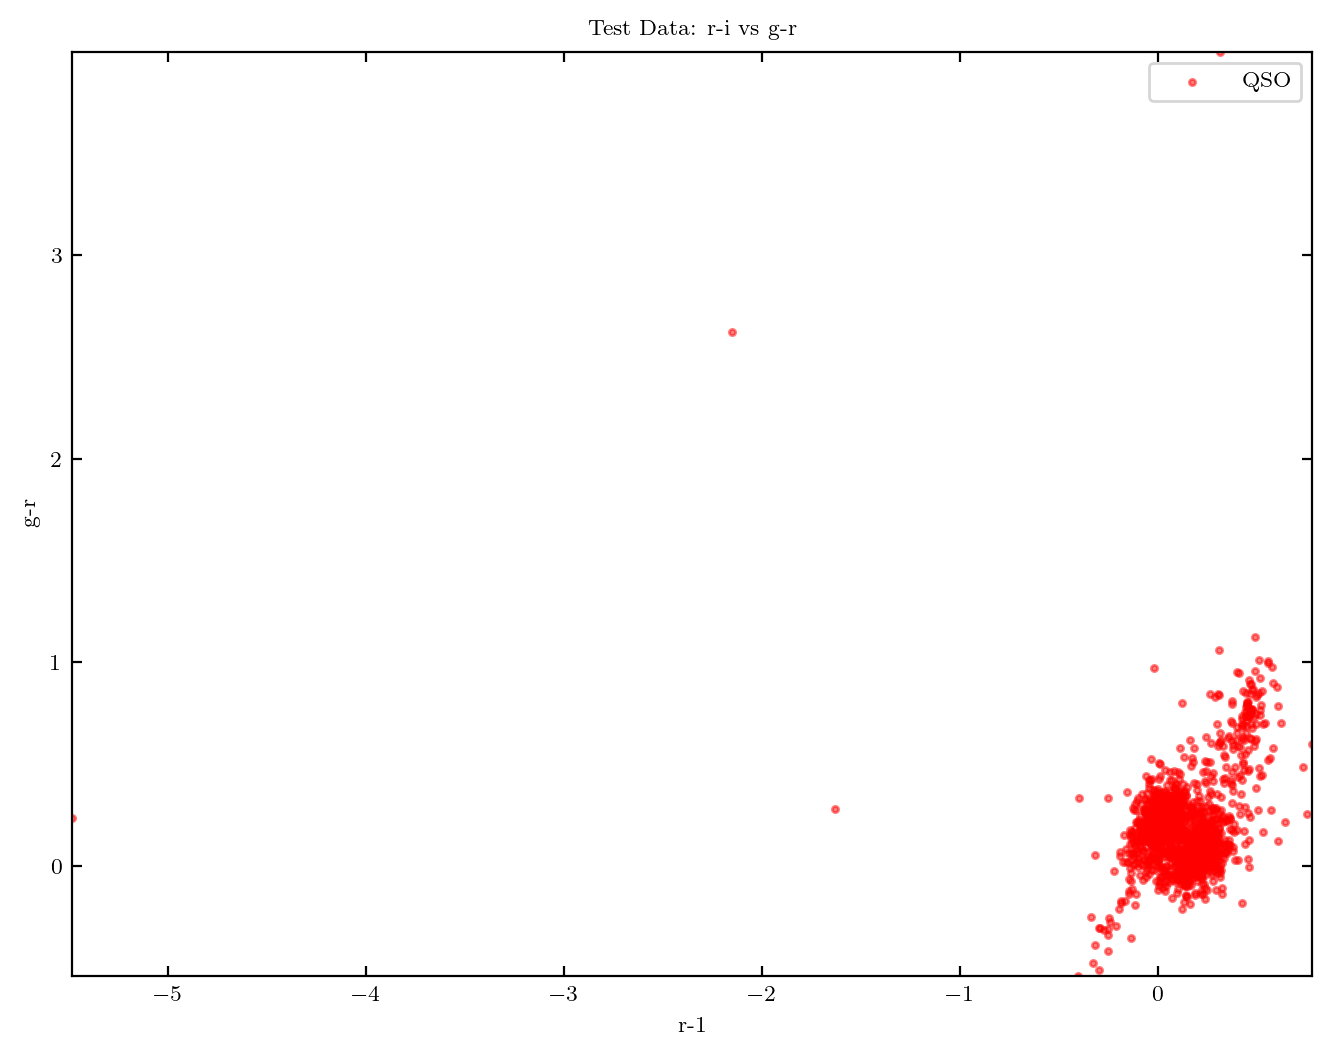

In [24]:
# u_g=u-g 0
# g_r=g-r 1
# r_i=r-i 2
# i_z=i-z 3
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 2], X_test[mask_qso, 1], 
            color='red', s=5, alpha=0.5, label='QSO')
# plt.scatter(X_test[mask_galaxy, 2], X_test[mask_galaxy, 1], 
#             color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('r-1')
plt.ylabel('g-r')
plt.title('Test Data: r-i vs g-r')
plt.legend()
plt.show()

for the QSO seems the two colors seems to be indipendent

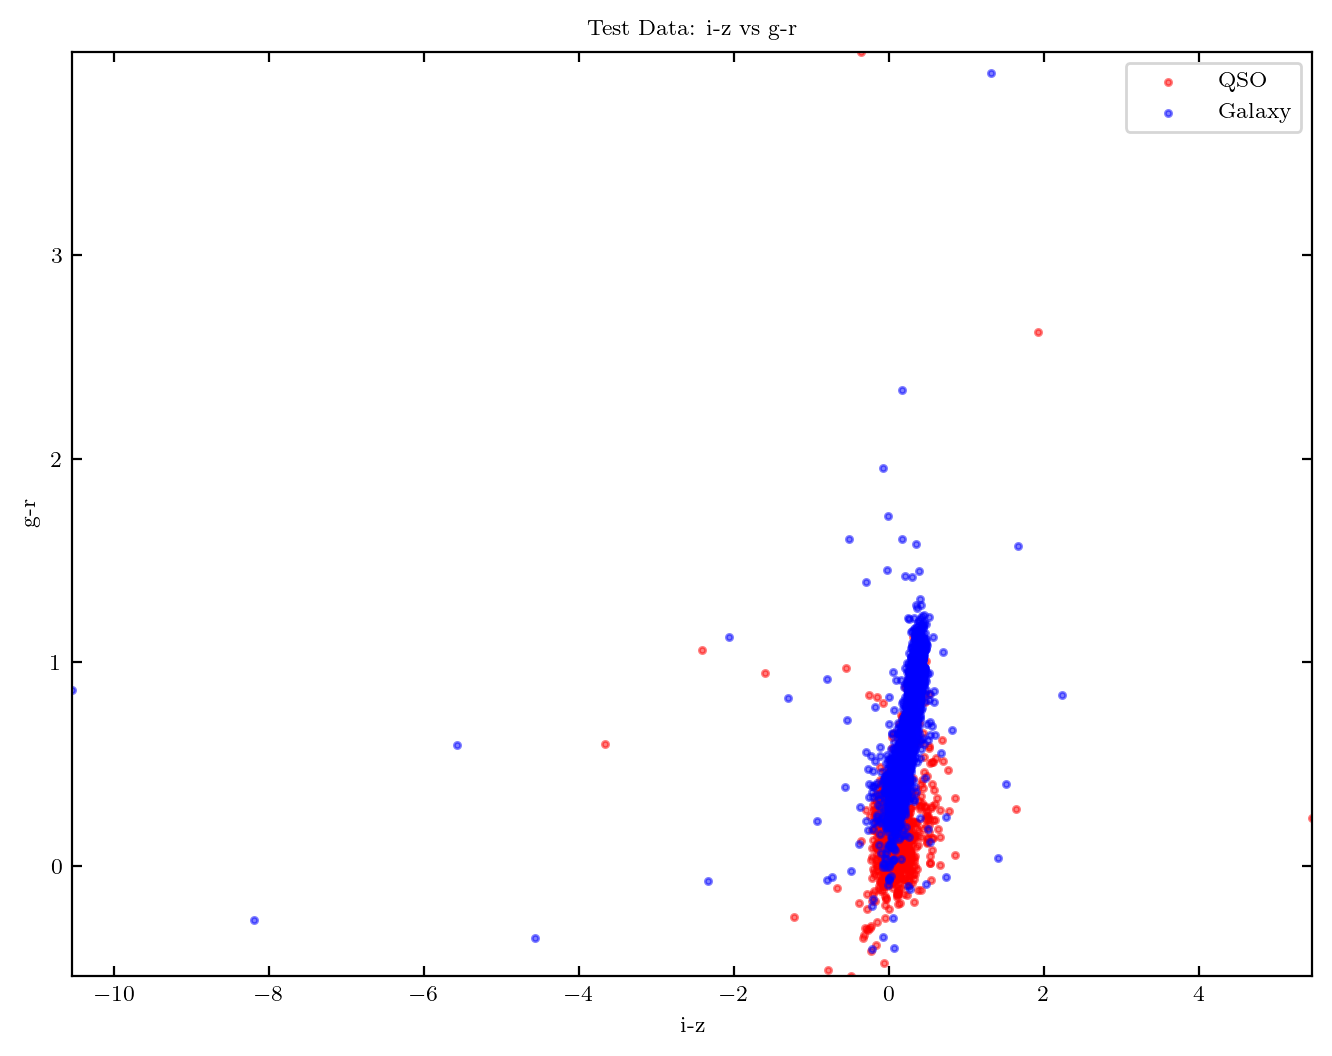

In [14]:
# u_g=u-g 0
# g_r=g-r 1
# r_i=r-i 2
# i_z=i-z 3
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 3], X_test[mask_qso, 1], 
            color='red', s=5, alpha=0.5, label='QSO')
plt.scatter(X_test[mask_galaxy, 3], X_test[mask_galaxy, 1], 
            color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('i-z')
plt.ylabel('g-r')
plt.title('Test Data: i-z vs g-r')
plt.legend()
plt.show()

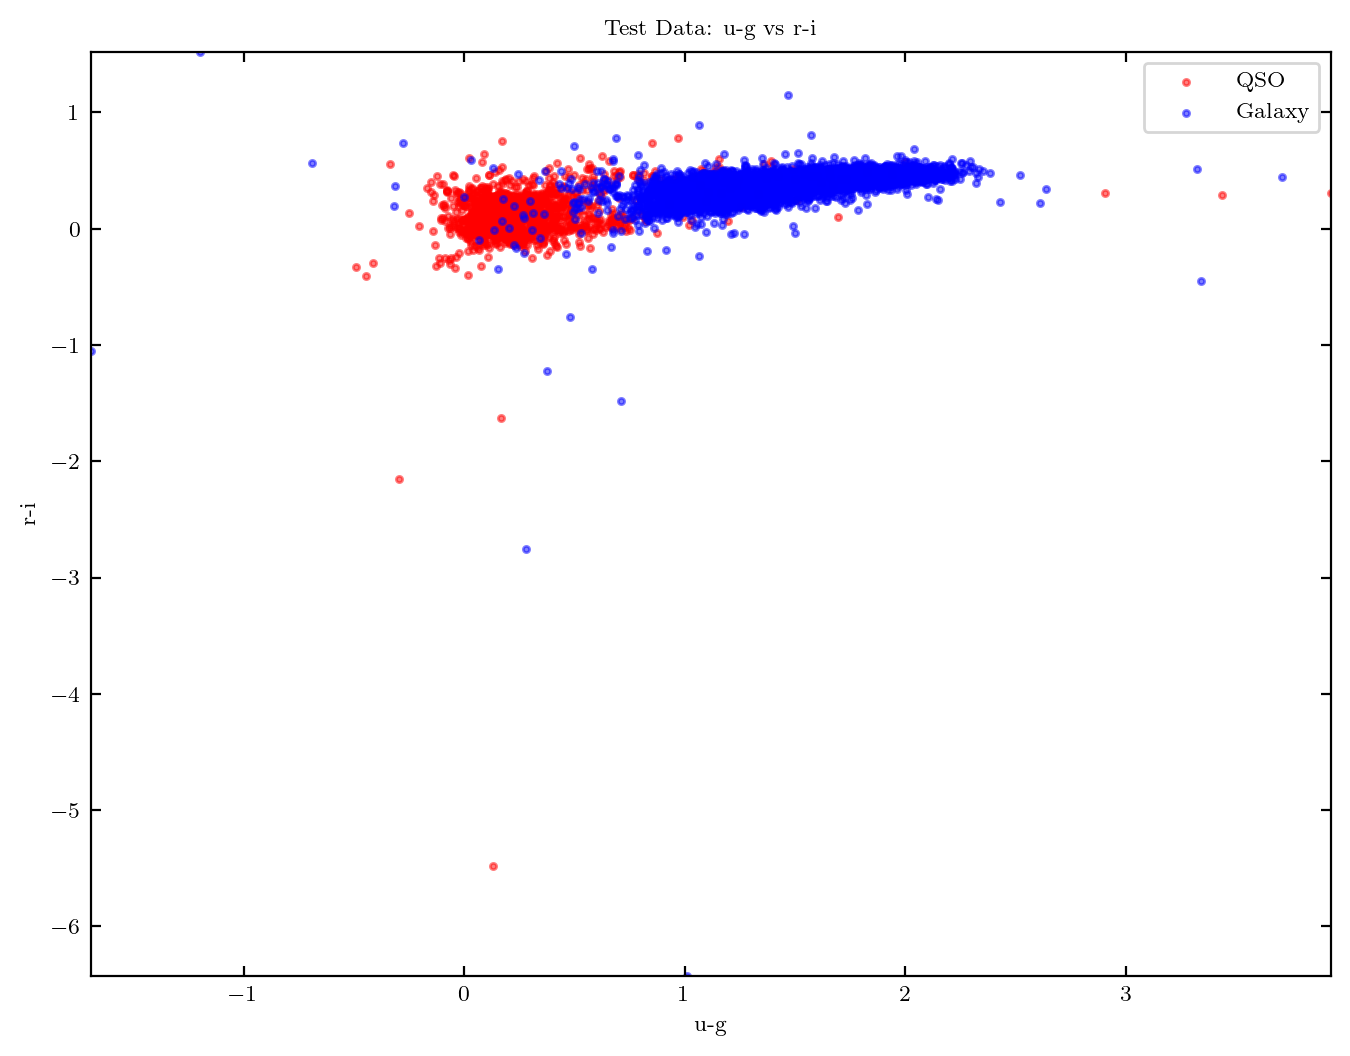

In [ ]:
# u_g=u-g 0
# g_r=g-r 1
# r_i=r-i 2
# i_z=i-z 3
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 0], X_test[mask_qso, 2], 
            color='red', s=5, alpha=0.5, label='QSO')
plt.scatter(X_test[mask_galaxy, 0], X_test[mask_galaxy, 2], 
            color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('u-g')
plt.ylabel('r-i')
plt.title('Test Data: u-g vs r-i')
plt.legend()
plt.show()

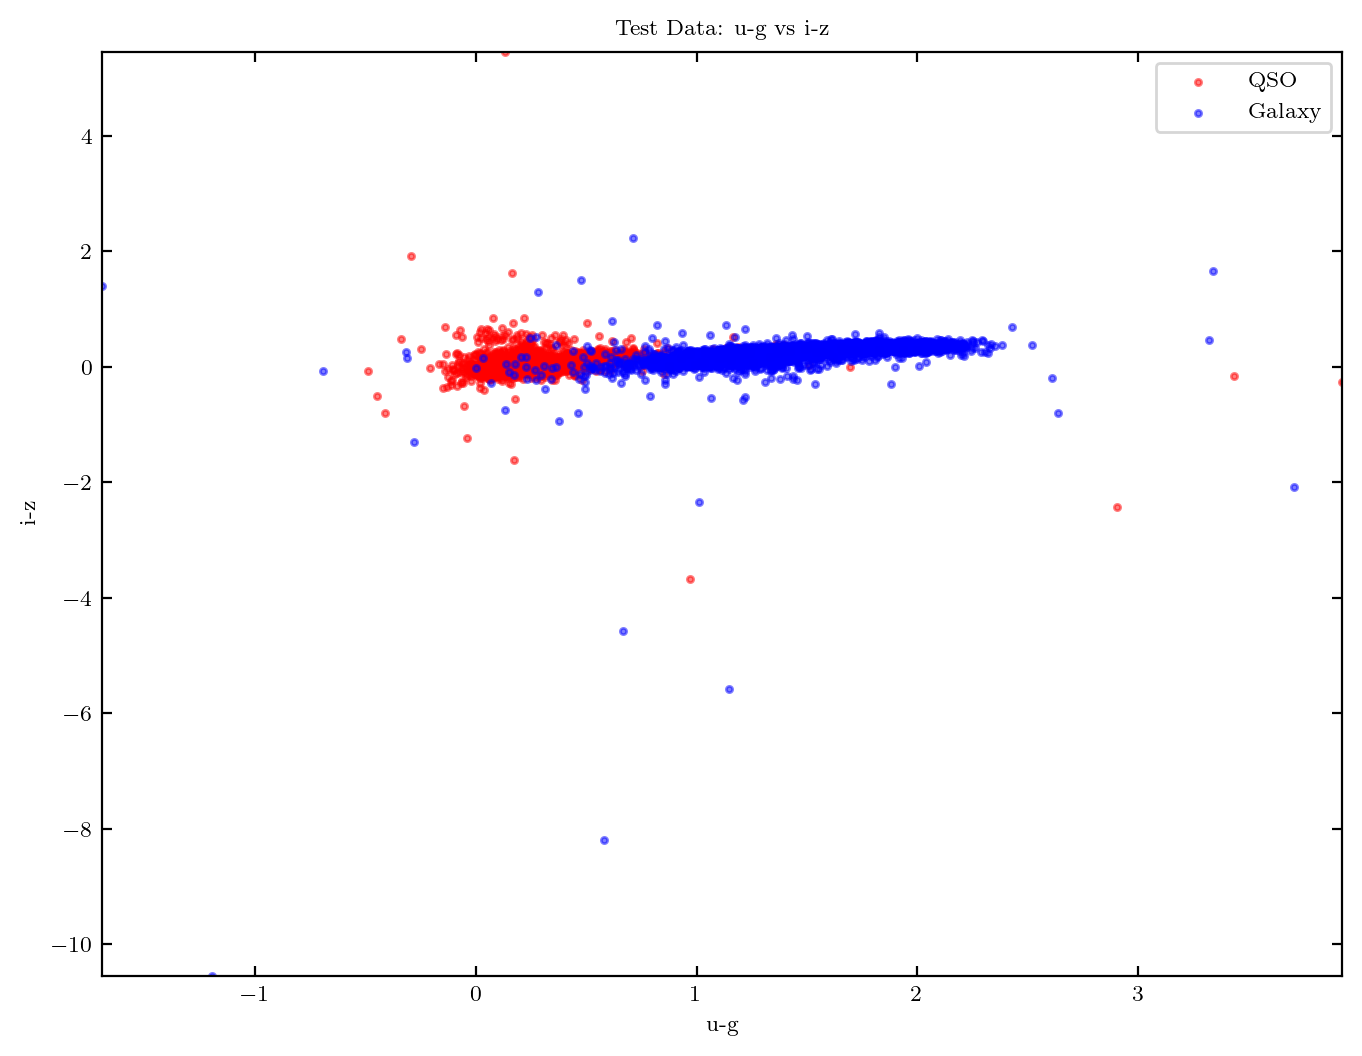

In [22]:
# u_g=u-g 0
# g_r=g-r 1
# r_i=r-i 2
# i_z=i-z 3
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 0], X_test[mask_qso, 3], 
            color='red', s=5, alpha=0.5, label='QSO')
plt.scatter(X_test[mask_galaxy, 0], X_test[mask_galaxy, 3], 
            color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('u-g')
plt.ylabel('i-z')
plt.title('Test Data: u-g vs i-z')
plt.legend()
plt.show()

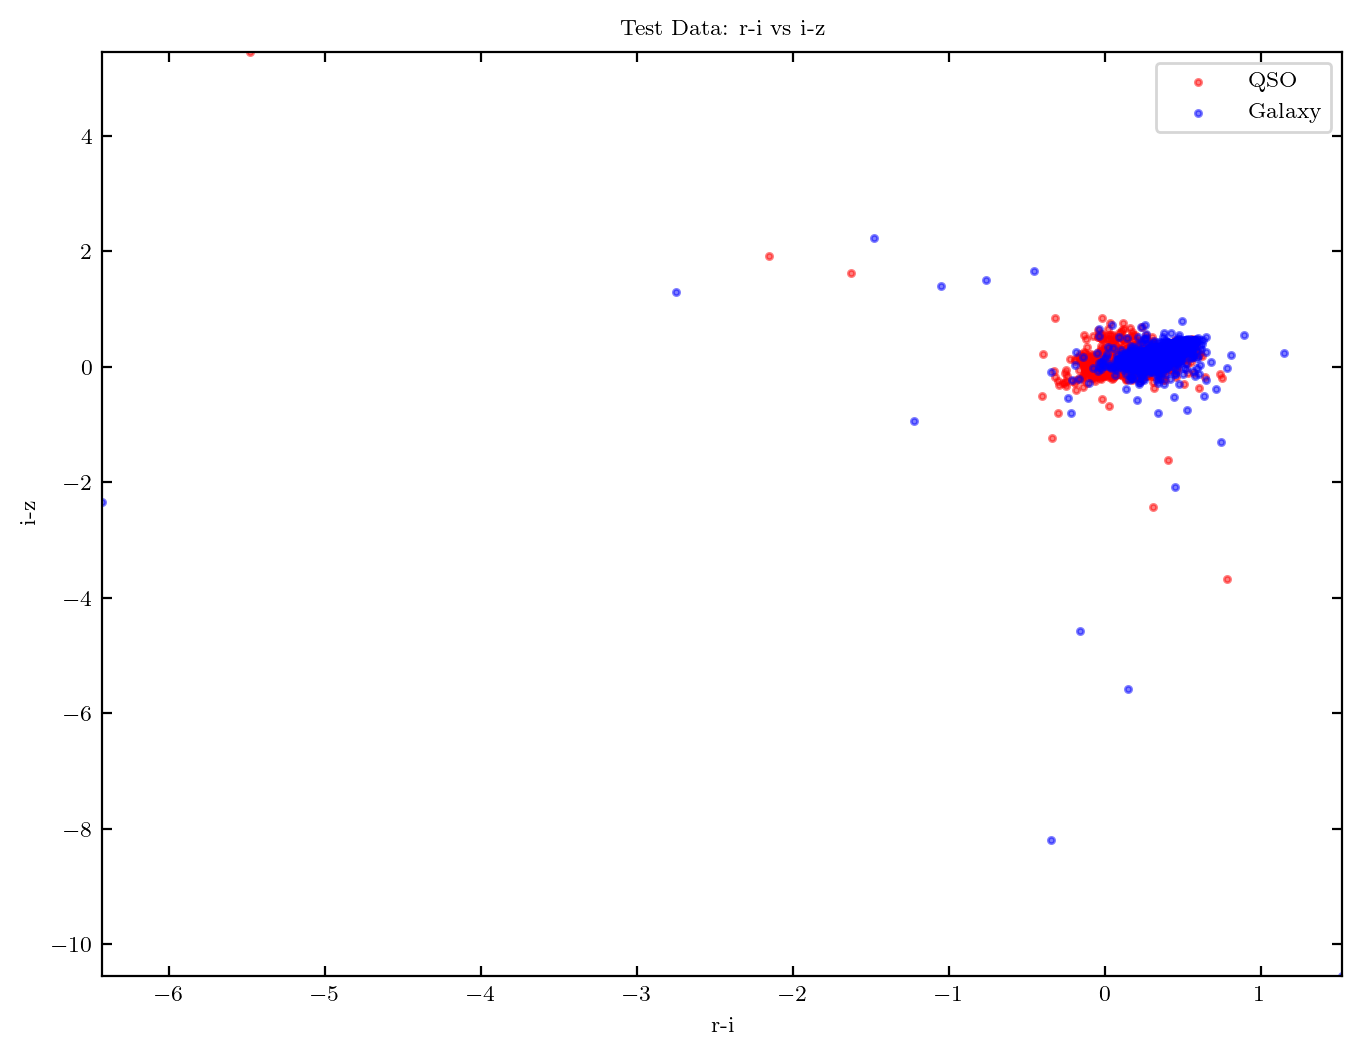

In [23]:
# u_g=u-g 0
# g_r=g-r 1
# r_i=r-i 2
# i_z=i-z 3
plt.figure(figsize=(8,6))

# Mask per le due popolazioni
mask_qso = (y_test == 0)
mask_galaxy = (y_test == -1)

plt.scatter(X_test[mask_qso, 2], X_test[mask_qso, 3], 
            color='red', s=5, alpha=0.5, label='QSO')
plt.scatter(X_test[mask_galaxy, 2], X_test[mask_galaxy, 3], 
            color='blue', s=5, alpha=0.5, label='Galaxy')

plt.xlabel('r-i')
plt.ylabel('i-z')
plt.title('Test Data: r-i vs i-z')
plt.legend()
plt.show()

for both qso and galaxy the two colors seems conditionally indipendent